# __CMSC 320: Final Project__

Nataliya Stepanova, Nick Wong, Sarah Marvi

## __Motivation__

Almost everyone has to deal with spam messages. No matter what we do, spam seems to always be sent to our phones, annoying many, and sucessfully tricking the unfortunately gullible. These spam messages at times also contain viruses when clicked, imposing danger to those who accidentally, or purposefully, respond or click on the link provided by these spam messages. To the public spam poses an annoyance at the least, and actual, life ruining danger to their data at the worst. To data science, with this experiment we want to see if there is a pattern in spam, and if we find one, suggest these patterns as ways to filter spam messages out of texts and alleviating the danger. We decided to use three patterns that we thought could be possible indicators of spam, and tested it out on texting data that we acquired. This tutorial will walk you through the process of how we did the experiment.

##__Data Collection__

We were interested in doing data processing related to natural language, since 2 of our 3 team members are Linguistics minors. While looking for natural language data, we came across the following website with links to several datasets for natural language processing: https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38. The SMS Spam Collection dataset specifically caught our eye, as we thought it would be interesting to apply machine learning prediction techniques to try to identify features that would allow us to predict whether a message was a spam message or not. 

So, we used the dataset located in the link for SMS spam collection and contacted the researchers to get their permission to use the data. Once we got their permission, we opened the data as a text file (since the data came as a generic file), and then converted it to a csv file using the “from text to csv” option in excel’s data tab, using the delimiter as a tab, and the file encoding as UTF-8. We then converted that data to a normal csv file, from which we grabbed data for our experiment. 

Here is the code for importing the data and doing relevant cleaning:

###__Loading the data__





In [0]:
import pandas as pd
import re

# Reading in csv
data = pd.read_csv("SMSSpamCollectionFormatted.csv")
# Renaming columns to descriptive names
data.rename(columns = {'Column1' : "Classifier", "Column2" : "Text"}, inplace = True)

data.head(10)

,Classifier,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


_*Note that __"spam"__ means a spam message, and __"ham"__ means a non-spam message._

### __Descriptive statistics of the dataset__

To get a general feel of the dataset, we wanted to figure out what percentage of the dataset consisted of spam messages in particular, so we ran the following:



In [0]:
non_spam_count = list(data['Classifier']).count('ham')
spam_count = list(data['Classifier']).count('spam')
total = data.shape[0]

print("Total: " + str(total) + ", Spam %: " + str(spam_count/total) + ", Non-spam %: " + str(non_spam_count/total))

Total: 5574, Spam %: 0.1340150699677072, Non-spam %: 0.8659849300322928


Total number of messages is 5574, 13.47% of the dataset (747 posts) are spam, and the other 86.53% of the dataset (4827 posts) is non-spam.

## __Data Processing/Cleaning__

We started off with brainstorming about what attributes of messges could be useful in deciding whether a message was spam or not. We decided on 3 patterns we thought would be decent predictors, namely:

1) __Capital letter__ (hypothesis is that non-spam will have less capital letters than spam, as from our personal experiences we have received a lot of spam messages of the form "CLICK HERE NOW TO...")

2) __Emoticon usage__ (hypothesis is that non-spam will have more emoticons than spam, because we predict that humans use emoticons more often for personal messages)

3) __Usage of specific words__ (we thought that from our personal experiences with spam, we would be able to identify some of the more common words used in spam messages, and use such a "spam words list" as a filter for spam vs. non-spam messages)

We performed exploratory data analysis to determine which of the above three predictors would be worthwhile to investigate further. We start off with diving deeper into capital letter usage.



###__Capital Letter Usage__
When we looked at capital letter usage, we decided to compare the amount of uppercase letters to the total amount of letters in the message. We put the percentages in a list along with the attached messages. After getting the percentage, we decided to create a threshold percentage before the message is considered as spam in our list. To be considered a success, the amount of false positives (hams in our list of spams) should be low, and the amount of spam caught out of the total spam should be high. We tested multiple thresholds, from 5% up to 20%, and found that for all the thresholds tested, the amount of spam missed was over 40%, and the amount of false positives was at best, a little less than 50% of the data put into our “spam list”. The best threshold we found was 10% capital letters.

In [0]:
# Capital letters

uppercase_list = []

for i in range(data.shape[0]) :
  curr_text = data['Text'][i]
  upper_count = 0
  total_count = len(curr_text)
  for c in curr_text:
    if c.isupper() :
      upper_count += 1
  uppercase_list.append(upper_count/total_count)
data['% of upper'] = uppercase_list
data.head()

,Classifier,Text,% of upper
0,ham,"Go until jurong point, crazy.. Available only ...",0.027027
1,ham,Ok lar... Joking wif u oni...,0.068966
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.064516
3,ham,U dun say so early hor... U c already then say...,0.040816
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.032787


In [0]:
# Showing a small sample of messages that are made up of more than 10% upper-case letter
data_mostly_upper = data[data['% of upper'] > 0.10]
data_mostly_upper.head(20)

,Classifier,Text,% of upper
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",0.125000
12,spam,URGENT! You have won a 1 week FREE membership ...,0.258065
14,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,0.742857
15,spam,"XXXMobileMovieClub: To use your credit, click ...",0.154362
19,spam,England v Macedonia - dont miss the goals/team...,0.206452
43,ham,WHO ARE YOU SEEING?,0.789474
54,spam,SMS. ac Sptv: The New Jersey Devils and the De...,0.200000
62,ham,Its a part of checking IQ,0.120000
67,spam,Urgent UR awarded a complimentary trip to Euro...,0.150943
72,ham,HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX,0.777778


In [0]:
# Total number of messages that are greater than 10% upper-case letters
data_mostly_upper.shape

(697, 3)

In [0]:
# Total number of "ham" messages that are greater than 10% upper-case letters
list(data_mostly_upper['Classifier']).count('spam')

364

In [0]:
# Showing a small sample of messages that are made up of less than 10% upper-case letter
data_mostly_lower = pd.concat([data, data_mostly_upper]).drop_duplicates()
data_mostly_lower.head(10)

,Classifier,Text,% of upper
0,ham,"Go until jurong point, crazy.. Available only ...",0.027027
1,ham,Ok lar... Joking wif u oni...,0.068966
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.064516
3,ham,U dun say so early hor... U c already then say...,0.040816
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.032787
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0.047619
6,ham,Even my brother is not like to speak with me. ...,0.025974
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0.062500
8,spam,WINNER!! As a valued network customer you have...,0.076433
9,spam,Had your mobile 11 months or more? U R entitle...,0.090909


In [0]:
# Total number of messages that are less than 10% upper-case letters
data_mostly_lower.shape

(5171, 3)

In [0]:
# Total number of "ham" messages that are less than 10% upper-case letters
list(data_mostly_lower['Classifier']).count('ham')

4518

__Analysis of results from code above:__

Using 10% as the threshold for percentage of capital letters used / lowercase letters used (where if a post's percentage of capital letters is above 10% threshold implies it is spam, and not spam otherwise), we were able to catch 364/697 = 52.22% of spam posts.

Below the 10% threshold, we had 4518/5170 = 87.39 non spam posts.
5170-4518 = 652 spam messages not detected, which is an error rate of 652/747 = 87.28%

__Conclusion__: do not use capital letters as predictors in machine learning modeling task, since the error rate is too high. 

### __Predict spam vs non-spam using emoticons?__

General question: does the presence of emoticons mean that the message is not spam?

When we looked at emoticon usage, we created a set of regex to compare against each message, and the code marks the message with the corresponding emoticon. Regex is code that can be used on strings to help detect patterns or impose restrictions on the strings, based on what you do with the regex. Here is a link in case you want to know more about regex:
https://developers.google.com/edu/python/regular-expressions#basic-examples. Once we found emoticons, we converted it to simpler representations so that we can detect the emoticons better. Then we create a separate list for each emoticon type, and go through the data, placing the messages in their respective lists according to what emoticon they have. We also combined the lists into a bigger list in order to have a master list of messages with emoticons. We then check how many of these messages are spam by looking at the master list (checking for false positives).

In [0]:
# Converting emoticons in messages into a variable name for easy identification
t = data['Text'].map(
    lambda text: re.sub(':\)|\(:|:\-\)|\(\-:|=\)|\(=', 'emoticon_smile_face', #smile_face = :) or (: or :-) or (-: or =) or (=
        re.sub(';\)|\(;|:\-\)|\(\-;', 'emoticon_smile_wink_face', #smile_wink_face = ;) or (; or ;-) or (-;
        re.sub(':\(|\(:|:\-\(|\(\-:|=\(|\(=', 'emoticon_frown_face', #frown_face = :( or ): or :-( or )-: or =( or )=
        re.sub(';\(|\(;|:\-\(|\(\-;', 'emoticon_frown_wink_face', #frown_wink_face = ;( or ); or ;-( or )-;
        re.sub('>:\(|\):<', 'emoticon_angry_face', #angry_face = >:( or ):<
        re.sub('<3', 'emoticon_heart', text))))))) #heart_typed = <3
k = " ".join(t)

# Finding the number of emoticons used in the entire dataset
agg = {'smile' : len(re.findall('emoticon_smile_face', k)), 'smile/wink' : len(re.findall('emoticon_smile_wink_face', k)), 
       'frown' : len(re.findall('emoticon_frown_face', k)), 'frown/wink' : len(re.findall('emoticon_frown_wink_face', k)),
       'angry' : len(re.findall('emoticon_angry_face', k)), 'heart' : len(re.findall('emoticon_heart', k))}
agg

{'angry': 0,
 'frown': 13,
 'frown/wink': 17,
 'heart': 0,
 'smile': 252,
 'smile/wink': 116}

In [0]:
# Create lists to keep track of emoticons (t/f if present)
t2 = t.map(lambda text: True if re.search('emoticon_smile_face', text) else False)
t3 = t.map(lambda text: True if re.search('emoticon_smile_wink_face', text) else False)
t4 = t.map(lambda text: True if re.search('emoticon_frown_face', text) else False)
t5 = t.map(lambda text: True if re.search('emoticon_frown_wink_face', text) else False)

# Combined list to keep track of whether there was any emoticon whatsoever
# Will use that to subset the original dataset and get a set of sms messages all with some type of emoticon

emoticons_present = []

for i in range(len(t2)) :
  if t2[i] or t3[i] or t4[i] or t5[i] :
    emoticons_present.append(True)
  else :
    emoticons_present.append(False)

data['Has Emote?'] = emoticons_present
data_with_emote = data[data['Has Emote?'] == True]
data_with_emote.head()

,Classifier,Text,% of upper,Has Emote?
16,ham,Oh k...i'm watching here:),0.038462,True
73,ham,K..k:)where are you?how did you performed?,0.023810,True
77,ham,I like you peoples very much:) but am very shy...,0.020000,True
130,ham,K..k:)how much does it cost?,0.035714,True
162,ham,New car and house for my parents.:)i have only...,0.015625,True


In [0]:
# ~6% of original data has emoticons
data_with_emote.shape

(334, 4)

In [0]:
# Listing messages that have emoticons in them
data_with_emote = data_with_emote.reset_index()
data_with_emote.head()

,index,Classifier,Text,% of upper,Has Emote?
0,16,ham,Oh k...i'm watching here:),0.038462,True
1,73,ham,K..k:)where are you?how did you performed?,0.023810,True
2,77,ham,I like you peoples very much:) but am very shy...,0.020000,True
3,130,ham,K..k:)how much does it cost?,0.035714,True
4,162,ham,New car and house for my parents.:)i have only...,0.015625,True


In [0]:
# Seeing if there are any spam messages that have emoticons in them
"spam" in list(data_with_emote['Classifier'])

False

As predicted, if any emoticon (of the ones we checked for, at least) is present in the SMS, then it is likely that the SMS message is not spam (for our particular dataset, it was 100% accurate in predicting non-spam). It seems like presence/absence of emoticons is a good predictor of spam/not spam, but only a small percentage of non-spam texts actually has emoticons. 

### __Words that are likely to show up in spam__

For this part of the experiment, we decided to think of words that we thought would show up often in spam, and use the presence/absence of such "spam words" as a predictor of spam vs. non-spam. We though that words like “win”, or “click” would qualify as such "spam words," in the sense that their presence in a message would suggest that a message likely could be spam. After that we brainstormed a list of some typical spam words and checked over the data for each spam word individually. We created a new column in the data where if the message contains at least 1 of any of the words in our "spam words list," then the column will say _true_, otherwise it will say _false_. We then go through the data again, putting all the messages with said column as _true_ into a new list - this list represents the messages which contained at least one "spam word." We then look inside that list and check for false positives, as well as see how the messages in the list compare to the data in total, to judge how good of a predictor this will be.


__Brainstorming, we came up with 14 "spam words" that will make up our "spam words list":__

urgent,
click,
prize,
share,
winner,
win,
https,
msgs,
cash,
money,
credit,
stop,
reply,
free

In [0]:
# List of 14 words that we thought were likely to show up in spam
spam_words_list = ['urgent', 'prize', 'click', 'share', 'win', 'won'
                   'http', 'msg', 'cash', 'money', 'credit', 'stop', 'reply', 'free']

data['Text to lower'] = data['Text'].map(lambda text: text.lower())
data.head()

,Classifier,Text,% of upper,Has Emote?,Text to lower
0,ham,"Go until jurong point, crazy.. Available only ...",0.027027,False,"go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,0.068966,False,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.064516,False,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,0.040816,False,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.032787,False,"nah i don't think he goes to usf, he lives aro..."


In [0]:
# Create lists to keep track of word usage (t/f if present)
urgent_list = t.map(lambda text: True if re.search('urgent', text) else False)
prize_list = t.map(lambda text: True if re.search('prize', text) else False)
click_list = t.map(lambda text: True if re.search('check', text) else False)
share_list = t.map(lambda text: True if re.search('share', text) else False)
winning_list = t.map(lambda text: True if (re.search('win', text) or re.search('won', text)) else False)
http_list = t.map(lambda text: True if re.search('http', text) else False)
msg_list = t.map(lambda text: True if re.search('msg', text) else False)
cash_list = t.map(lambda text: True if re.search('cash', text) else False)
money_list = t.map(lambda text: True if re.search('money', text) else False)
credit_list = t.map(lambda text: True if (re.search('credit', text) or re.search('won', text)) else False)
stop_list = t.map(lambda text: True if re.search('stop', text) else False)
reply_list = t.map(lambda text: True if re.search('reply', text) else False)
free_list = t.map(lambda text: True if re.search('free', text) else False)

# Combined list to keep track of whether there were any spam words
# Will use that to subset the original dataset and get a set of sms messages all with some type of spam word

spam_words_present = []

for i in range(len(urgent_list)) :
  if urgent_list[i] or prize_list[i] or click_list[i] or share_list[i] or winning_list[i]:
    spam_words_present.append(True)
  elif http_list[i] or msg_list[i] or cash_list[i] or money_list[i] or credit_list[i]:
    spam_words_present.append(True)
  elif stop_list[i] or reply_list[i] or free_list[i]:
    spam_words_present.append(True)
  else :
    spam_words_present.append(False)

data['Has Spam Word?'] = spam_words_present
data_with_spam_word = data[data['Has Spam Word?'] == True]
data_with_spam_word = data_with_spam_word.reset_index()
data_with_spam_word.head()

,index,Classifier,Text,% of upper,Has Emote?,Text to lower,Has Spam Word?
0,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.064516,False,free entry in 2 a wkly comp to win fa cup fina...,True
1,8,spam,WINNER!! As a valued network customer you have...,0.076433,False,winner!! as a valued network customer you have...,True
2,11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",0.125000,False,"six chances to win cash! from 100 to 20,000 po...",True
3,12,spam,URGENT! You have won a 1 week FREE membership ...,0.258065,False,urgent! you have won a 1 week free membership ...,True
4,13,ham,I've been searching for the right words to tha...,0.015306,False,i've been searching for the right words to tha...,True


In [0]:
# ~18% of the data has at least one of the words identified by us as a potential "spam word"
data_with_spam_word.shape

(900, 7)

In [0]:
# List number of 'spam' messages detected using our spam word classifiers
list(data_with_spam_word['Classifier']).count('spam')

353

Using our "spam words list" results in a HUGE error margin of (900 - 353)/900 = 60.78% (this means ~61% of the data we would predict to be spam using our predictor is not actually spam). Also, we do not catch (747 - 353)/747 = 52.74% of the spam. Clearly, using this predetermined list of "spam words" does not work for determining spam vs. non-spam.



## __Creating Predictors for our Model__ 

From doing our preliminary checks above we concluded the following in creating our predictor model:

_1)_ We should not use capital letters as a predictor of spam vs. ham.

_2)_ Emoticons could be a good predictor, but not enough of the messages in the data set contain emoticon usage.

So, we will focus ONLY on the "spam words" to train logistic regression model.

Also, we referenced the following link to figure out how to go about creating our predictors: https://www.geeksforgeeks.org/bag-of-words-bow-model-in-nlp/. Specifically, we derived inspiration from the Bag-Of-Words section, and decided to analogously create one predictor using the same technnique.
 
Thus, to train our model, we decided to predict spam based on specific words that would show up more frequently in spam messages. We created two variations on this kind of predictor:

_1)_ Count of spam words present in SMS message (1 value)

_2)_ 14x1 vector with percentage of the message that is composed of that spam word in position i (i.e. our first spam word is "urgent," so if a message had 5 words total, one of which was "urgent," and all the other words were non-spam words, the corresponding vector would be [0.2, 0, 0, ...]).

In [0]:
## Creating the predictors for our model
all_predictors = []
all_spam_count = []

for i in range(data.shape[0]) :
  curr_predictor = []
  curr_spam_word_count = 0
  curr_msg = str(data['Text'][i])
  total_word_count = len(curr_msg.split())
  # loop through each of 12 spam words
  # for each word count # of occurences
  for j in range(len(spam_words_list)) :
    curr_predictor.append(len(re.findall(spam_words_list[j], curr_msg)) / total_word_count)
    if re.search(spam_words_list[j], curr_msg) :
      curr_spam_word_count += 1
  all_predictors.append(curr_predictor)
  all_spam_count.append(curr_spam_word_count)

data['Spam Word List Predictor'] = all_predictors  
data['# Distinct Spam Words'] = all_spam_count
data.head(10)

,Classifier,Text,% of upper,Has Emote?,Text to lower,Has Spam Word?,Spam Word List Predictor,# Distinct Spam Words
0,ham,"Go until jurong point, crazy.. Available only ...",0.027027,False,"go until jurong point, crazy.. available only ...",False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,ham,Ok lar... Joking wif u oni...,0.068966,False,ok lar... joking wif u oni...,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.064516,False,free entry in 2 a wkly comp to win fa cup fina...,True,"[0.0, 0.0, 0.0, 0.0, 0.03571428571428571, 0.0,...",1
3,ham,U dun say so early hor... U c already then say...,0.040816,False,u dun say so early hor... u c already then say...,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.032787,False,"nah i don't think he goes to usf, he lives aro...",False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0.047619,False,freemsg hey there darling it's been 3 week's n...,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
6,ham,Even my brother is not like to speak with me. ...,0.025974,False,even my brother is not like to speak with me. ...,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0.062500,False,as per your request 'melle melle (oru minnamin...,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
8,spam,WINNER!! As a valued network customer you have...,0.076433,False,winner!! as a valued network customer you have...,True,"[0.0, 0.038461538461538464, 0.0, 0.0, 0.0, 0.0...",1
9,spam,Had your mobile 11 months or more? U R entitle...,0.090909,False,had your mobile 11 months or more? u r entitle...,False,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


## __Training Our Models__

We decided to use 10-fold cross-validation and logistic regression to predict spam vs. not spam (we used the following link for more information on cross-validation: https://machinelearningmastery.com/k-fold-cross-validation/).  As predictors, we are comparing two things:

1) Total number of distinct spam words present in message (min 0, max 14) 

2) 14x1 vector with percentage of spam word _i_'s occurence in position _i_

The following code creates two models, one per each predictor we have decided upon, and calculates AUROC over 10-fold cross-validation for both models:

In [0]:
import sklearn
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn import metrics

X1 = np.array(list(data['# Distinct Spam Words'])).reshape(-1,1)
X2 = list(data['Spam Word List Predictor'])
Y = list(data['Classifier'])

cv_obj = sklearn.model_selection.StratifiedKFold(n_splits=10)

X1_scaled = preprocessing.scale(X1)
X2_scaled = preprocessing.scale(X2)

model_1 = LogisticRegression()
model_2 = LogisticRegression()

Y = np.array(Y)
   
def get_roc_data(model, cv_obj, x):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i, (train, test) in enumerate(cv_obj.split(x, Y)):
        model.fit(x[train], Y[train])
        scores = model.predict_proba(x[test])[:,1]
        fpr, tpr, _ = sklearn.metrics.roc_curve(Y[test],scores, pos_label = "spam")
        
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'fpr': mean_fpr, 'tpr': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])
        
        aucs.append(sklearn.metrics.auc(fpr, tpr))
        
    curve_df = curve_df.groupby('fpr').agg({'tpr': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0
    
    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df

# get roc curve data for model_1
curve_df_1, auc_df_1 = get_roc_data(model_1, cv_obj, X1_scaled)
curve_df_1['model'] = '# distinct spam words'
auc_df_1['model'] = '# distinct spam words'

# get roc curve data for model_2
curve_df_2, auc_df_2 = get_roc_data(model_2, cv_obj, X2_scaled)
curve_df_2['model'] = 'list of spam words'
auc_df_2['model'] = 'list of spam words'

# combine the roc curve data
curve_df = pd.concat([curve_df_1, curve_df_2])
auc_df = pd.concat([auc_df_1, auc_df_2])

auc_df

,fold,auc,model
0,0,0.725217,# distinct spam words
1,1,0.675652,# distinct spam words
2,2,0.708489,# distinct spam words
3,3,0.703506,# distinct spam words
4,4,0.703892,# distinct spam words
5,5,0.638590,# distinct spam words
6,6,0.691413,# distinct spam words
7,7,0.693209,# distinct spam words
8,8,0.705588,# distinct spam words
9,9,0.670678,# distinct spam words


Above, we can see a dataframe of the AUROC for each of the 10-fold cross-validations for each predictor. However, it is difficult to extract patterns when the data is in that form, so we decide to plot it as shown below:

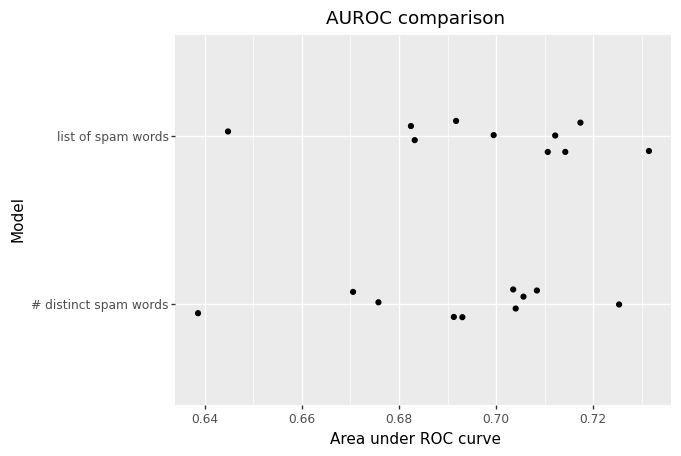

<ggplot: (-9223363280284768554)>

In [0]:
from plotnine import *

# plot the distribution of auc estimates
(ggplot(auc_df, aes(x='model', y='auc')) + 
     geom_jitter(position=position_jitter(0.1)) +
     coord_flip() +
     labs(title = "AUROC comparison",
          x="Model",
          y="Area under ROC curve"))

Plotting didn't help us visually notice any clear distinction between the models. The range for AUROC for both models is about the same, from ~0.64 to ~0.73. And, although the lowest AUROC for the model that uses number of distinct spam words as a predictor is lower than the lowest AUROC for the model that uses the list of spam words as a predictor, the distribution of all the other AUROCs seems to be clustered around the same general area, so we have to run a two-sided test to check whether there is actually any statistically significant difference between the models.

In [0]:
# use a two-sided test (based on linear regression) to see if there is a 
# statistically significant difference in auc estimates
import statsmodels.formula.api as smf
lm_fit = smf.ols('auc~model', data=auc_df).fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    auc   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.4207
Date:                Fri, 15 May 2020   Prob (F-statistic):              0.525
Time:                        20:37:03   Log-Likelihood:                 46.798
No. Observations:                  20   AIC:                            -89.60
Df Residuals:                      18   BIC:                            -87.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       0.6916      0.008     89.008      0.000       0.675       0.708
model[T.list of spam words]     0.0071      0.011      0.649      0.525      -0.016       0.030
==============================================================================
Omnibus:                        4.557   Durbin-Watson:                   2.456
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                2.844
Skew:                          -0.909   Prob(JB):                        0.241
Kurtosis:                       3.328   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Discussion of AUROC:__ There is a very small increase (+0.71%) in AUROC for the "list of spam words" model, but it is not statistically significant (p = 0.525 > 0.005). So, the models are relatively the same in terms of predicting power. The very strong similarity between the models was further confirmed by the ROC curve that we plotted below:

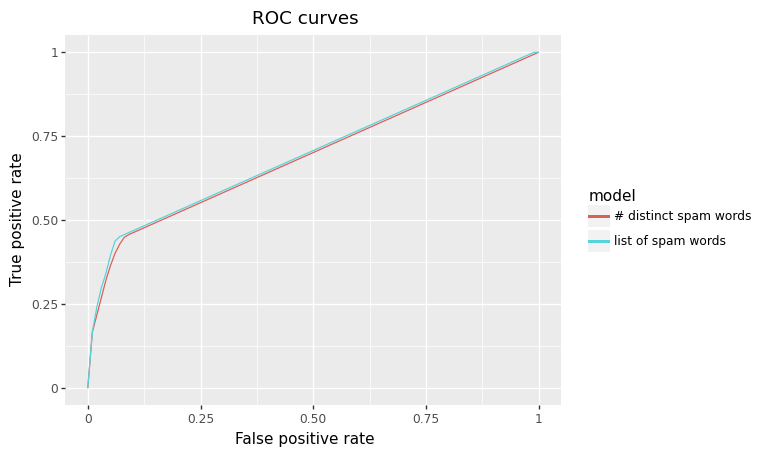

<ggplot: (8756556808652)>

In [0]:
mean_curve_df = curve_df.groupby(['model','fpr']).agg({'tpr': 'mean'}).reset_index()
(ggplot(mean_curve_df, aes(x='fpr', y='tpr', color='model')) +
    geom_line() +
    labs(title = "ROC curves",
         x = "False positive rate",
         y = "True positive rate"))

__Interpretation:__

Both models aren't that great at predicting messages to be spam, operating at a TPR of ~50% when the False positive rate is ~15%. After a certain point (around (0.25, 0.45)), the ROC curve becomes linear. This implies after that point, it is operating almost exclusively at chance, only taking advantage of the initial boost in predicting power. 

## __Conclusion:__

Spam is complicated to predict, and there are a multitude of factors contributing to whether a message is spam, some of which include:

1) __Emoticons__ - Emoticons are a good predictor for whether a message is spam or not, but people do not use emoticons enough to justify using them as a predictor. So, emoticons by themselves are not a good enough predictor to capture all spam.

2) __Capital Letter Usage__ - The amount of false positives that we found in our experiments were unacceptable, with the lowest amount of false positives being about 50% (this is when we used the threshold of 10% capital letters).

3) __Specific Words__ - ROC curves confirmed that this is the area where we could use the most improvements, since we used our intuition to determine the words that were considered spam. With what we had, we determined that specfic words would not be a good filter due to high false positive rates (at 66% false positives). 

We did not test everything that could be possible for predicting a spam message but we decided to test these three factors in our experiments. Upon reflection we decided that in the future we could revise our experiment to get more accurate filtration by doing the following:

1) We reconsidered how we could set up our predicting model - maybe we should more complex statistical techinques like Naive Bayes instead of Logistic Regression.

2) We reconsidered what words we used as our "spam words list" - perhaps we should have looped through all the spam words and figured out which words are the most frequent in the spam data to use as a baseline for our list.

3) We could reconsider our model - Decision Tree or Random Forest Classifiers might perform better than Logistic Regression.

4) We should think of other characteristics of spam messages we could exploit.

Overall, we did not find any pattern or combination thereof that would allow us to successfully determine with a high degree of reliability whether a message is spam or not. So, unfortunately, we weren't able to come up with a single recommendation we could give people looking for a quick heuristic by which to protect themselves from clicking on spam. But, we _were_ able to determine which factors are _not_ good predictors, and although this result isn't as satisfying as determining the best predictors, it still is a step forward in automating spam detection.

##__References__:

_Almeida, T.A., Gómez Hidalgo, J.M., Silva, T.P.  Towards SMS Spam Filtering: Results under a New Dataset.   International Journal of Information Security Science (IJISS), 2(1), 1-18, 2013._

_Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results.  Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011._

_Almeida, T. A., Gómez Hidalgo, J.M. (2011). SMS Spam Collection v. 1. Retrieved May 10, 2020, from http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/_

_Brownlee, J. (2019, August 8). A Gentle Introduction to k-fold Cross-Validation. Retrieved May 15, 2020, from https://machinelearningmastery.com/k-fold-cross-validation/_

_Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

_Dubrey, P. (2018, November 28). An introduction to Bag of Words and how to code it in Python for NLP. Retrieved May 15, 2020, from https://www.freecodecamp.org/news/an-introduction-to-bag-of-words-and-how-to-code-it-in-python-for-nlp-282e87a9da04/_

_Gómez Hidalgo, J.M., Almeida, T.A., Yamakami, A. On the Validity of a New SMS Spam Collection.  Proceedings of the 11th IEEE International Conference on Machine Learning and Applications (ICMLA'12), Boca Raton, FL, USA, 2012._ 

_Python Regular Expressions  |  Python Education  |  Google Developers. (2018, December 19). Retrieved May 15, 2020, from https://developers.google.com/edu/python/regular-expressions_



